In [40]:
import numpy as np

## Семинар №3. Основы scikit-learn. Алгоритм k-NN.

На этом семинаре мы начнём изучать самую популярную библиотеку для машинного обучения, а именно scikit-learn.
Здесь написано огромное число базовых функций и алгоритмов. У них понятный интерфейс, поэтому использовать их очень просто.

### Вспоминаем ООП

Чтобы начать пользоваться scikit-learn'ом, нужно вспомнить, как устроены классы в питоне. 

Давайте рассмотрим игрушечный пример. Создадим класс ```EatingRabbit```. Объект класса — кролик, которого мы хотим покормить морковкой. Для этого мы создадим метод ```feed(num_carrots)```, после вызова которого «кролик» должен написать, сколько моркови он уже съел. Но не всё так просто: у каждого кролика есть предел, больше которого он съесть не может. Если предел достигнут, нужно написать ```'I am overflowed!'```.

In [35]:
class EatingRabbit:
    def __init__(self, limit=10):
        self.counter = 0
        self.limit = limit
        
    def feed(self, num_carrots):
        self.counter += num_carrots
        if self.counter <= self.limit:
            print('Thanks, I`ve eaten {0} carrot(s)!'.format(self.counter))
        else:
            self.counter -= num_carrots
            print('I`m overflowed!')

In [36]:
rabbit_1 = EatingRabbit(10)
rabbit_1.feed(2)
rabbit_1.feed(3)
rabbit_1.feed(6)

Thanks, I`ve eaten 2 carrot(s)!
Thanks, I`ve eaten 5 carrot(s)!
I`m overflowed!


Можно создать несколько объектов класса EatingRabbit с разными значениями limit. У каждого будет свой счётчик моркови:

In [37]:
rabbit_1 = EatingRabbit(10)
rabbit_2 = EatingRabbit(15)
rabbit_1.feed(4)
rabbit_2.feed(7)
rabbit_1.feed(1)
rabbit_1.feed(5)
rabbit_2.feed(1)

Thanks, I`ve eaten 4 carrot(s)!
Thanks, I`ve eaten 7 carrot(s)!
Thanks, I`ve eaten 5 carrot(s)!
Thanks, I`ve eaten 10 carrot(s)!
Thanks, I`ve eaten 8 carrot(s)!


### Об интерфейсе алгоритмов

Алгоритмы в sklearn'е — это  классы языка питон. У них могут быть методы:

**```fit(X_train, y_train)```** или **```fit(X_train)```**. 

Здесь ```X_train``` — это объекты обучающей выборки, то есть числовая матрица «объекты × признаки», а ```y_train``` — это вектор ответов. В методе ```fit``` происходит _обучение алгоритма_, то есть нахождение его _параметров_.

Алгоритмы обучения без учителя на вход получают только матрицу «объекты × признаки», а алгоритмы обучения с учителем ещё и ответы на этих объектах.

**```predict(X_test)```** — построение прогноза для тестовой выборки. Здесь ```X_test``` — это тоже матрица «объекты × признаки», но только уже для объектов тестовой выборки. 

Многие алгоритмы классификации умеют ещё и строить оценку вероятности принадлежности объекта заданному классу. Эти вероятности можно получить, вызвав **```predict_proba(X_test)```**.

Кроме алгоритмов классификации, регрессии и кластеризации в sklearn есть и другие: для предобработки данных, извлечения и отбора признаков или уменьшения признакового пространства. Для них вместо метода ```predict``` реализован метод **```transform(X)```**.

На работу алгоритма влияют две сущности:
* параметры, которые алгоритм настраивает сам,
* гиперпараметры, которые алгоритм не может настроить сам — ему нужно помочь. Гиперпараметры нужно определить при создании класса и передать в конструктор класса.

Давайте проверим, что всё работает. 

Сначала искусственно создадим данные (для задачи двухклассовой классификации):

In [82]:
X_train = np.array([
        [3, 9],
        [2, 8],
        [4, 8],
        [3, 7],
        [4, 7],
        [2, 6],
        [8, 3],
        [1, 8],
        [2, 7],
        [6, 3],
        [7, 2],
        [7, 3],
        [7, 4],
        [8, 5]])
y_train = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
X_test = np.array([
        [3, 8],
        [1, 7],
        [6, 2],
        [8, 4]])
y_test = np.array([1, 1, 0, 0])

... и нарисуем картинку:

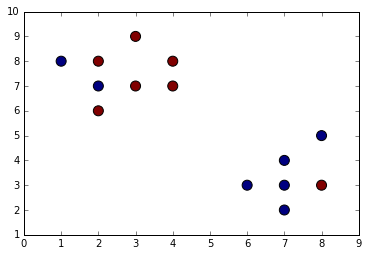

In [175]:
# Строчка, чтобы графики отображались в ноутбуке:
%matplotlib inline
# Вызов библиотеки:
import matplotlib.pyplot as plt

# Нарисуем точки из обучающей выборки:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, s=100)

Попробуйте сами ответить, как отработает алгоритм трёх ближайших соседей с евклидовой метрикой.

In [ ]:
X_test = np.array([
        [3, 8],
        [1, 7],
        [6, 2],
        [8, 4]])

Теперь можно запускать классификатор. Чтобы найти, как называется и где лежит нужный алгоритм в sklearn'е, нужно просто погуглить. Запрос «k nearest neighbors classification scikit-learn» приведёт нас на [нужную страницу](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier). Можем импортировать алгоритм:

In [176]:
from sklearn.neighbors import KNeighborsClassifier

Теперь создаём классификатор — объект класса KNeighborsClassifier. В круглых скобочках передаём гиперпараметры алгоритма. Значения гиперапараметров пока возьмём «с потолка»: ```metric='euclidean'``` и ```n_neighbors=3```.

In [177]:
clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

Запускаем метод ```fit``` для обучения алгоритма:

In [178]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Теперь запускаем метод ```predict``` для получения ответа алгоритма на тестовой выборке:

In [179]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 0])

Ура! Мы обучили первый классификатор! Вместо ```KNeighborsClassifier``` можно взять любой другой алгоритм классификации, поменяв в коде лишь названия и значения гиперпараметров.

Осталось измерить качество полученного алгоритма. Самый простой способ — посчитать долю правильных ответов. Для этого в ```sklearn.metrics``` есть функция ```accuracy_score```.

In [180]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y_test, y_pred=y_pred)

0.75

То же самое можно сделать в numpy так:

In [181]:
np.mean(y_test == y_pred) # По умолчанию True — это 1, а False — 0

0.75

### О разделении выборки на обучение и контроль

В реальной жизни часто нет готового разбиения всей выборки на обучающую и контрольную: есть только X и y — выборку надо разбить. Но перед этим её нужно случайно перемешать (почему?), а потом поделить в нужной пропорции.

В стародавние времена эту рутинную операцию нужно было писать своими руками, но теперь есть функция ```train_test_split``` из ```sklearn.model_selection```.

In [115]:
from sklearn.model_selection import train_test_split

# Склеим данные обратно:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

# Построим новое разбиение на обучение и контроль
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.3, random_state=42)

Здесь важно указывать ```random_state```, чтобы каждый раз генерировалась одинаковая последовательность псевдослучайных чисел.

### О kNN для классификации

Алгоритм K ближайших соседей подробно обсуждали на лекции. Мы считаем, что объект — это точка в многомерном пространстве, где каждая координата — это признак. Между точками в многомерном пространстве можно посчитать расстояние. Предполагаем, что чем ближе объекты находятся в признаковом пространстве, тем они более похожи («гипотеза компактности»).

Алгоритм k ближайших соседей для **классификации** устроен просто. На этапе обучения он просто запоминает обучающую выборку. А когда нужно сделать предсказание класса нового объекта, он просто смотрит на классы $k$ (гиперпараметр) самых близких соседей и относит объект к самому распространённому классу среди соседей.

Общую формулу можно записать вот так:

$$
a(x) = \arg\max_{y \in \mathbb{Y}} \sum\limits_{i = 1}^{k} \left[y_{(i)} = y \right]
$$

В формуле много на первый взгляд непонятных обозначений. Поясним их по порядку:

• $x$ — это новый объект из тестовой выборки, для него нужно сделать предказание;

• $a$ значит алгоритм. Он принимает на вход $x$ и возвращает класс из множества $\mathbb{Y}$;

• $\mathbb{Y}$ — это множество классов;

• $\arg\max$ — это функция, возвращающая аргумент, на которой достигается максимум выражения. Поясним на примере. Рассмотрим функцию $-(0.5 - x)^2$ на отрезке $[0, 1]$. Максимум это функции на нём равен нулю, то есть $\max\limits_{x \in [0, 1]} \lbrace -(0.5 - x)^2\rbrace = 0$. Максимум достигается при $x = 0.5$, а значит $\arg\max\limits_{x \in [0, 1]} \lbrace -(0.5 - x)^2\rbrace = 0.5$. 

• [ ] — это индикаторная функция. Индикатор от чего-то истинного равен 1, а от ложного — 0. Например $[2 + 2 = 4] = 1$, но $[1 = 0] = 0$. Иногда такое обозначение называют нотацией Айверсона.

• Осталось понять, что такое $y_{(i)}$. Начнём издалека: вспомним, что у нас есть обучающая выборка в виде $x_1, \ldots, x_n$ — объектов и $y_1, \ldots, y_n$. Для каждого объекта $x$ из тестовой выборки мы можем упорядочить объекты обучающей выборки так, что $x_{(1)}$ будет ближайшим соседом, а $x_{(n)}$ — самым дальним. Соотственно, $y_{(1)}$ — класс самого близкого соседа, а $y_{(n)}$ — класс самого дальнего.

Соотстветственно, алгоритм зависит от двух гиперпараметров: метрики (она же — функция расстояния) и числа учитываемых ближайших соседей.